# Trainig a Model Using the MNIST datase for recgonise hand-writen digits
    On this notebook we show how to create a model using  MNIST dataset.
    We start showing how to read the bits from the dataset



  [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/) 

# The Data

  We will start by undertandig how the data is formated and parsing it i a suuitable way for train our model.
  
  Mnist provide 4 files: 



## Little and Big Endian Architecture 

  There are 2 types of processors architecture(litle and big endian). In litle endian bits are store from left to righ This is basically how the bytes are stored, in litle they are stored from left to right and in big the other way around.(Look this is you want to know more about https://chortle.ccsu.edu/AssemblyTutorial/Chapter-15/ass15_3.html ).
  This is relevant for us because we need to know read the bytes right for get the proper data.
  In python we can easyle check using sys, since I am using a Intel processor i expected to be litle.

In [1]:
import numpy as np
from sys import byteorder

Now we can check  our architecture:

In [2]:
print(byteorder)

little


## Reading Mnist
    Now we can start reading the train images file. 
    For the tain images we espected (this data can be found in the Mnist website).
   

In [3]:
import gzip

with gzip.open('mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    fc_train_img = f.read()

 The first 4 bytes is the magic number which is a 32 bit integer, for the image set this number is 2051. Note that we are setting the byteorder as big.

In [4]:
int.from_bytes(fc_train_img[0:4], byteorder='big')

2051

 Next is the the number of images as a 32 bit integer:

In [5]:
train_img_total = int.from_bytes(fc_train_img[4:8], byteorder='big')
train_img_total

60000

Then number of rows as 32 bit integer.

In [6]:
row = int.from_bytes(fc_train_img[8:12], byteorder='big')
row

28

And a columns as 32 bit integer.

In [7]:
col = int.from_bytes(fc_train_img[12:16], byteorder='big')
col

28

Then unsigned bytes(8 bits) , each byte represent a pixel. They are orginezed row-wise.

The total of bits is : 
```python
train_img_total*row*col
```





In [8]:
last_byte = (train_img_total*row*col) + 16
last_byte

47040016

Now whe can read all bits:

In [9]:
x_train = list(fc_train_img[16:last_byte])

And reshape them ass 28*27 (784) array. They represent our vector.

Also in Mnist pixel values are 0 to 255.0 , 0 representing the background. We want ot invert this, because having a non zero value as background is better for the trainig. 

In [10]:
x_train = ~np.array(x_train).reshape(train_img_total,row*col).astype(np.uint8)
x_train.shape

(60000, 784)

We can see one image using pyplot:

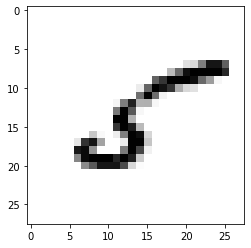

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(x_train[11].reshape(row,col), cmap='gray')

Thats look like the image 11 is a 5. We can now read labels and check.

In [12]:
with gzip.open('mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    fc_train_lbl = f.read()

First 32 bits are magin number : 2049

In [13]:
int.from_bytes(fc_train_lbl[0:4], byteorder='big')


2049

Then a 32 bits intiger, the total of labels. Must be 6000 as we got 6000 images. 

In [14]:
train_lvl_total = int.from_bytes(fc_train_lbl[4:8], byteorder='big')
train_lvl_total

60000

Now each unsigned byte is a label, so we can check that 11 is 5:

In [15]:
y_train = np.array(list(fc_train_lbl[8:train_lvl_total+8]))
print(y_train[11])

5


We now real the test images and labels:

In [16]:
with gzip.open('mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    fc_test_img = f.read()
with gzip.open('mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    fc_test_lbl = f.read()
    
test_img_total = int.from_bytes(fc_test_img[4:8], byteorder='big')
test_lbl_total = int.from_bytes(fc_test_lbl[4:8], byteorder='big')

last_byte = (test_img_total*row*col) + 16
x_test = list(fc_test_img[16:last_byte])
x_test = ~np.array(x_test).reshape(test_img_total,row*col).astype(np.uint8)

y_test = np.array(list(fc_test_lbl[8:test_lbl_total+8]))

In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [18]:
x_train =  x_train/255.0
x_test = x_test/255.0

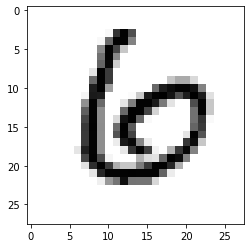

In [19]:
plt.imshow(x_test[11].reshape(row,col), cmap='gray')

In [20]:
print(y_test[11])

6


In [21]:
import keras as kr

Using TensorFlow backend.


In [22]:
model = kr.models.Sequential()

In [23]:
model.add(kr.layers.Dense(units=10, input_dim=784, activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

## Activation : softmax
  We want our result to represent a probablility of being one of the 10 digits(0,1,3...).
  The softmax activation function will do this for us, it will output our output for each neuron beetwen 0 and 1.Then each 
  of our neuron can represent a a digit so the one will bigger probability will be our prediction.
  
  $$\sigma (z)_j = \frac{e^{(z)_j}}{\sum_{k=0}^{K}e^{(z)_k}} \text{  where   j = 1,...,K}$$  
  
  In our case K = 10.
  
  https://www.analyticsvidhya.com/blog/2017/10/fundamentals-deep-learning-activation-functions-when-to-use-them/



In [25]:
test = np.arange(0.0, 784, 1).reshape(1,784)
result = model.predict(test)
result


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [26]:
sum = 0 
for i in result[0]:
    sum += i
sum

1.0

## Loss : categorical_crossentropy

    After we calculate our result we need to calculate the distance beetween our prediction and our epected result.
    https://algorithmia.com/blog/introduction-to-loss-functions
    

## Optimazer : adam
https://algorithmia.com/blog/introduction-to-optimizers

In [27]:
y_train = kr.utils.to_categorical(y_train, 10)
y_test  = kr.utils.to_categorical(y_test, 10)

In [28]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [29]:
epoch = 1
history_callback = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epoch, batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 1s 23us/step - loss: 0.7819 - accuracy: 0.7937 - val_loss: 0.4445 - val_accuracy: 0.8792


In [30]:
val_accuracy = np.array(history_callback.history['val_accuracy'])
val_loss =  np.array(history_callback.history['val_loss'])
accuracy =  np.array(history_callback.history['accuracy'])
loss =  np.array(history_callback.history['loss'])

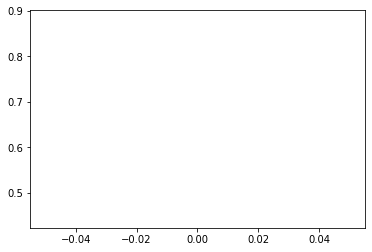

In [31]:
x = np.arange(0.0, epoch, 1)
plt.plot(x,val_accuracy,x,accuracy,x,loss,x,val_loss)

In [32]:
model_final  = kr.models.Sequential()
class CustomModelCheckpoint(kr.callbacks.Callback):
    minimun = 0.8
          
    def on_epoch_end(self, epoch, logs=None):
       
        # logs is a dictionary
        print(f"epoch: {epoch},history_callback.{logs['val_accuracy']}")
       
        if logs['val_accuracy'] > self.minimun: # your custom condition
    
          
            model.save('model1.h5', overwrite=True)
                     
            self.minimun = logs['val_accuracy']
            print(self.minimun)
            print("saved")

In [33]:
cbk = CustomModelCheckpoint()
history_callback = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epoch, batch_size=100, callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 1s 22us/step - loss: 0.4250 - accuracy: 0.8796 - val_loss: 0.3674 - val_accuracy: 0.8960
epoch: 0,history_callback.0.8960000276565552
0.8960000276565552
saved


In [34]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(units=512, input_dim=784, activation='relu'))
model.add(kr.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [35]:
history_callback = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epoch, batch_size=100,
                             callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 2s 28us/step - loss: 0.5620 - accuracy: 0.8347 - val_loss: 0.3662 - val_accuracy: 0.8883
epoch: 0,history_callback.0.8883000016212463


In [38]:
val_accuracy = np.array(history_callback.history['val_accuracy'])
val_loss =  np.array(history_callback.history['val_loss'])
accuracy =  np.array(history_callback.history['accuracy'])
loss =  np.array(history_callback.history['loss'])

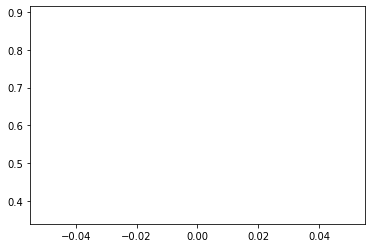

In [39]:
x = np.arange(0.0, epoch, 1)
plt.plot(x,val_accuracy,x,accuracy,x,loss,x,val_loss)

In [40]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(units=512, input_dim=784, activation='relu'))
model.add(kr.layers.Dropout(0.01))
model.add(kr.layers.Dense(units=98, activation='relu'))
model.add(kr.layers.Dropout(0.1))
model.add(kr.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [41]:
epoch = 10
history_callback = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epoch, batch_size=100
                             , callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.5709 - accuracy: 0.8214 - val_loss: 0.3626 - val_accuracy: 0.8907
epoch: 0,history_callback.0.8906999826431274
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.3075 - accuracy: 0.9061 - val_loss: 0.2023 - val_accuracy: 0.9377
epoch: 1,history_callback.0.9376999735832214
0.9376999735832214
saved
Epoch 3/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.2394 - accuracy: 0.9261 - val_loss: 0.2060 - val_accuracy: 0.9356
epoch: 2,history_callback.0.9355999827384949
Epoch 4/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.1948 - accuracy: 0.9397 - val_loss: 0.1600 - val_accuracy: 0.9516
epoch: 3,history_callback.0.9516000151634216
0.9516000151634216
saved
Epoch 5/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.1719 - accuracy: 0.9470 - val_loss: 0.1575 - val_ac

In [42]:
val_accuracy = np.array(history_callback.history['val_accuracy'])
val_loss =  np.array(history_callback.history['val_loss'])
accuracy =  np.array(history_callback.history['accuracy'])
loss =  np.array(history_callback.history['loss'])

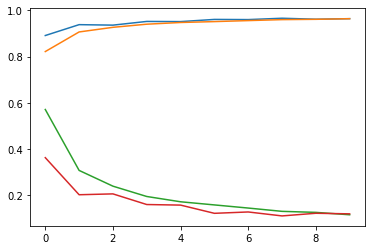

In [43]:

x = np.arange(0.0, epoch, 1)
plt.plot(x,val_accuracy,x,accuracy,x,loss,x,val_loss)

In [44]:
score = kr.models.load_model('./model1.h5').evaluate(x_test, y_test, verbose=0)
score

[0.11077445906959474, 0.965399980545044]

In [45]:
x_train = x_train.reshape(train_img_total,col,row,1)
x_test = x_test.reshape(test_img_total,col,row,1)

In [46]:
model = kr.models.Sequential()
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Conv2D(128,kernel_size=(5, 5),activation='relu'))
model.add(kr.layers.Conv2D(256,kernel_size=(3, 3),activation='relu'))
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Flatten())
model.add(kr.layers.Dropout(0.25))
model.add(kr.layers.Dense(units=98, activation='relu'))
model.add(kr.layers.Dropout(0.1))
model.add(kr.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [47]:
epoch = 1
history_callback = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epoch, batch_size=100
                             , callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 7s 120us/step - loss: 0.2255 - accuracy: 0.9281 - val_loss: 0.0520 - val_accuracy: 0.9842
epoch: 0,history_callback.0.9842000007629395
0.9842000007629395
saved


In [50]:
score = kr.models.load_model('./model1.h5').evaluate(x_test, y_test, verbose=0)
score

[0.05199244136838242, 0.9842000007629395]

In [51]:
model = kr.models.Sequential()
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
kr.layers.BatchNormalization(axis=-1)
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
kr.layers.BatchNormalization(axis=-1)
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Conv2D(128,kernel_size=(5, 5),activation='relu'))
kr.layers.BatchNormalization(axis=-1)
model.add(kr.layers.Conv2D(256,kernel_size=(3, 3),activation='relu'))
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Flatten())
model.add(kr.layers.Dropout(0.25))
model.add(kr.layers.Dense(units=98, activation='relu'))
model.add(kr.layers.Dropout(0.1))
model.add(kr.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [52]:
epoch = 1
history_callback = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epoch, batch_size=100
                             , callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 6s 94us/step - loss: 0.2198 - accuracy: 0.9287 - val_loss: 0.0617 - val_accuracy: 0.9803
epoch: 0,history_callback.0.9803000092506409


In [53]:
score = kr.models.load_model('./model1.h5').evaluate(x_test, y_test, verbose=0)
score

[0.05199244136838242, 0.9842000007629395]

In [54]:
model = kr.models.Sequential()
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
kr.layers.normalization.BatchNormalization(axis=-1)
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
kr.layers.normalization.BatchNormalization(axis=-1)
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Conv2D(128,kernel_size=(5, 5),activation='relu'))
model.add(kr.layers.Conv2D(256,kernel_size=(3, 3),activation='relu'))
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Dropout(0.25))
model.add(kr.layers.Flatten())
model.add(kr.layers.Dense(units=10, activation='softmax'))
model.compile(loss=kr.losses.categorical_crossentropy,optimizer='adadelta',metrics=['accuracy'])
model.summary()
 



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 22, 22, 64)        3200      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        200768    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 128)         204928    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 2, 2, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 1, 256)        

In [55]:
from keras.preprocessing.image import ImageDataGenerator

In [56]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [57]:
train_generator = gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)

In [58]:
epoch =700
history_callback= model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=epoch, 
                    validation_data=test_generator, validation_steps=10000//64, callbacks=[cbk])

Epoch 1/700
937/937 [==============================] - 10s 11ms/step - loss: 0.3018 - accuracy: 0.9014 - val_loss: 0.0406 - val_accuracy: 0.9883
epoch: 0,history_callback.0.98828125
0.98828125
saved
Epoch 2/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0722 - accuracy: 0.9791 - val_loss: 0.0173 - val_accuracy: 0.9855
epoch: 1,history_callback.0.9855072498321533
Epoch 3/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0538 - accuracy: 0.9847 - val_loss: 0.0024 - val_accuracy: 0.9919
epoch: 2,history_callback.0.9919484853744507
0.9919484853744507
saved
Epoch 4/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0472 - accuracy: 0.9864 - val_loss: 0.0221 - val_accuracy: 0.9933
epoch: 3,history_callback.0.9932568669319153
0.9932568669319153
saved
Epoch 5/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0403 - accuracy: 0.9890 - val_loss: 4.8932e-04 - val_accuracy: 0.9925
epoch: 4,history_callback.0.9924

937/937 [==============================] - 10s 11ms/step - loss: 0.0130 - accuracy: 0.9967 - val_loss: 0.0667 - val_accuracy: 0.9957
epoch: 41,history_callback.0.9956722855567932
Epoch 43/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0120 - accuracy: 0.9965 - val_loss: 0.0195 - val_accuracy: 0.9959
epoch: 42,history_callback.0.9958735704421997
Epoch 44/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0094 - accuracy: 0.9975 - val_loss: 5.2154e-08 - val_accuracy: 0.9955
epoch: 43,history_callback.0.9954710006713867
Epoch 45/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0127 - accuracy: 0.9964 - val_loss: 1.0133e-06 - val_accuracy: 0.9948
epoch: 44,history_callback.0.9947665333747864
Epoch 46/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 7.4506e-08 - val_accuracy: 0.9961
epoch: 45,history_callback.0.9960748553276062
Epoch 47/700
937/937 [===================

937/937 [==============================] - 10s 11ms/step - loss: 0.0095 - accuracy: 0.9980 - val_loss: 1.6391e-07 - val_accuracy: 0.9952
epoch: 83,history_callback.0.9951691031455994
Epoch 85/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0104 - accuracy: 0.9979 - val_loss: 0.0035 - val_accuracy: 0.9950
epoch: 84,history_callback.0.9949678182601929
Epoch 86/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0092 - accuracy: 0.9978 - val_loss: 2.4598e-04 - val_accuracy: 0.9946
epoch: 85,history_callback.0.9945651888847351
Epoch 87/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0124 - accuracy: 0.9971 - val_loss: 3.5204e-07 - val_accuracy: 0.9954
epoch: 86,history_callback.0.9953703880310059
Epoch 88/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0118 - accuracy: 0.9972 - val_loss: 6.2956e-07 - val_accuracy: 0.9953
epoch: 87,history_callback.0.9952697157859802
Epoch 89/700
937/937 [===============

epoch: 124,history_callback.0.9960748553276062
Epoch 126/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0102 - accuracy: 0.9980 - val_loss: 0.0000e+00 - val_accuracy: 0.9950
epoch: 125,history_callback.0.9949678182601929
Epoch 127/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0089 - accuracy: 0.9981 - val_loss: 1.1653e-04 - val_accuracy: 0.9948
epoch: 126,history_callback.0.9947665333747864
Epoch 128/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0093 - accuracy: 0.9985 - val_loss: 0.3982 - val_accuracy: 0.9963
epoch: 127,history_callback.0.9962761402130127
Epoch 129/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0109 - accuracy: 0.9980 - val_loss: 0.0000e+00 - val_accuracy: 0.9959
epoch: 128,history_callback.0.9958735704421997
Epoch 130/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0106 - accuracy: 0.9979 - val_loss: 0.2651 - val_accuracy: 0.9962
epoch: 129,history

937/937 [==============================] - 10s 11ms/step - loss: 0.0085 - accuracy: 0.9985 - val_loss: 0.0000e+00 - val_accuracy: 0.9943
epoch: 166,history_callback.0.9942632913589478
Epoch 168/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0095 - accuracy: 0.9980 - val_loss: 2.1094e-04 - val_accuracy: 0.9966
epoch: 167,history_callback.0.9965780973434448
Epoch 169/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0098 - accuracy: 0.9984 - val_loss: 5.5879e-09 - val_accuracy: 0.9938
epoch: 168,history_callback.0.9937600493431091
Epoch 170/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0108 - accuracy: 0.9981 - val_loss: 0.2058 - val_accuracy: 0.9964
epoch: 169,history_callback.0.9963768124580383
Epoch 171/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0091 - accuracy: 0.9984 - val_loss: 0.0271 - val_accuracy: 0.9953
epoch: 170,history_callback.0.9952697157859802
Epoch 172/700
937/937 [=========

epoch: 207,history_callback.0.9955716729164124
Epoch 209/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0086 - accuracy: 0.9984 - val_loss: 0.0000e+00 - val_accuracy: 0.9949
epoch: 208,history_callback.0.9948671460151672
Epoch 210/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0095 - accuracy: 0.9984 - val_loss: 0.0000e+00 - val_accuracy: 0.9944
epoch: 209,history_callback.0.9943639039993286
Epoch 211/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0092 - accuracy: 0.9984 - val_loss: 0.0966 - val_accuracy: 0.9949
epoch: 210,history_callback.0.9948671460151672
Epoch 212/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.0000e+00 - val_accuracy: 0.9961
epoch: 211,history_callback.0.9960748553276062
Epoch 213/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0093 - accuracy: 0.9985 - val_loss: 0.0000e+00 - val_accuracy: 0.9971
epoch: 212,his

937/937 [==============================] - 10s 11ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.0000e+00 - val_accuracy: 0.9952
epoch: 249,history_callback.0.9951691031455994
Epoch 251/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0116 - accuracy: 0.9983 - val_loss: 0.0758 - val_accuracy: 0.9959
epoch: 250,history_callback.0.9958735704421997
Epoch 252/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0128 - accuracy: 0.9981 - val_loss: 0.1504 - val_accuracy: 0.9945
epoch: 251,history_callback.0.9944645762443542
Epoch 253/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0112 - accuracy: 0.9984 - val_loss: 0.0020 - val_accuracy: 0.9957
epoch: 252,history_callback.0.9956722855567932
Epoch 254/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0116 - accuracy: 0.9983 - val_loss: 0.0000e+00 - val_accuracy: 0.9955
epoch: 253,history_callback.0.9954710006713867
Epoch 255/700
937/937 [=============

epoch: 290,history_callback.0.9953703880310059
Epoch 292/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0118 - accuracy: 0.9983 - val_loss: 0.0000e+00 - val_accuracy: 0.9949
epoch: 291,history_callback.0.9948671460151672
Epoch 293/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0089 - accuracy: 0.9986 - val_loss: 0.0164 - val_accuracy: 0.9951
epoch: 292,history_callback.0.9950684309005737
Epoch 294/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0091 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 0.9950
epoch: 293,history_callback.0.9949678182601929
Epoch 295/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0104 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 0.9942
epoch: 294,history_callback.0.9941626191139221
Epoch 296/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0114 - accuracy: 0.9985 - val_loss: 0.0000e+00 - val_accuracy: 0.9961
epoch: 295,his

937/937 [==============================] - 11s 11ms/step - loss: 0.0120 - accuracy: 0.9983 - val_loss: 0.0018 - val_accuracy: 0.9957
epoch: 332,history_callback.0.9956722855567932
Epoch 334/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0068 - accuracy: 0.9989 - val_loss: 0.0000e+00 - val_accuracy: 0.9948
epoch: 333,history_callback.0.9947665333747864
Epoch 335/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0093 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 0.9948
epoch: 334,history_callback.0.9947665333747864
Epoch 336/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0096 - accuracy: 0.9987 - val_loss: 1.1236 - val_accuracy: 0.9950
epoch: 335,history_callback.0.9949678182601929
Epoch 337/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0129 - accuracy: 0.9983 - val_loss: 0.0000e+00 - val_accuracy: 0.9952
epoch: 336,history_callback.0.9951691031455994
Epoch 338/700
937/937 [=========

epoch: 373,history_callback.0.996477484703064
Epoch 375/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0103 - accuracy: 0.9985 - val_loss: 0.0000e+00 - val_accuracy: 0.9954
epoch: 374,history_callback.0.9953703880310059
Epoch 376/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0108 - accuracy: 0.9987 - val_loss: 0.6064 - val_accuracy: 0.9951
epoch: 375,history_callback.0.9950684309005737
Epoch 377/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0116 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 0.9952
epoch: 376,history_callback.0.9951691031455994
Epoch 378/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0106 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 0.9954
epoch: 377,history_callback.0.9953703880310059
Epoch 379/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0124 - accuracy: 0.9983 - val_loss: 0.0000e+00 - val_accuracy: 0.9957
epoch: 378,hist

937/937 [==============================] - 11s 12ms/step - loss: 0.0104 - accuracy: 0.9988 - val_loss: 0.0013 - val_accuracy: 0.9960
epoch: 415,history_callback.0.9959742426872253
Epoch 417/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0105 - accuracy: 0.9985 - val_loss: 0.0093 - val_accuracy: 0.9946
epoch: 416,history_callback.0.9945651888847351
Epoch 418/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0100 - accuracy: 0.9990 - val_loss: 1.4901e-08 - val_accuracy: 0.9948
epoch: 417,history_callback.0.9947665333747864
Epoch 419/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0111 - accuracy: 0.9986 - val_loss: 1.3951 - val_accuracy: 0.9950
epoch: 418,history_callback.0.9949678182601929
Epoch 420/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0115 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 0.9958
epoch: 419,history_callback.0.9957729578018188
Epoch 421/700
937/937 [=============

epoch: 456,history_callback.0.9953703880310059
Epoch 458/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0099 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 0.9949
epoch: 457,history_callback.0.9948671460151672
Epoch 459/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0120 - accuracy: 0.9985 - val_loss: 6.8918e-08 - val_accuracy: 0.9950
epoch: 458,history_callback.0.9949678182601929
Epoch 460/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0127 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 0.9964
epoch: 459,history_callback.0.9963768124580383
Epoch 461/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0125 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 0.9959
epoch: 460,history_callback.0.9958735704421997
Epoch 462/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0102 - accuracy: 0.9989 - val_loss: 3.7253e-09 - val_accuracy: 0.9967
epoch: 461

937/937 [==============================] - 11s 12ms/step - loss: 0.0124 - accuracy: 0.9987 - val_loss: 8.4336e-04 - val_accuracy: 0.9961
epoch: 498,history_callback.0.9960748553276062
Epoch 500/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0112 - accuracy: 0.9988 - val_loss: 0.0000e+00 - val_accuracy: 0.9962
epoch: 499,history_callback.0.9961755275726318
Epoch 501/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0133 - accuracy: 0.9986 - val_loss: 1.5868 - val_accuracy: 0.9962
epoch: 500,history_callback.0.9961755275726318
Epoch 502/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0146 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 0.9949
epoch: 501,history_callback.0.9948671460151672
Epoch 503/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0152 - accuracy: 0.9983 - val_loss: 0.0019 - val_accuracy: 0.9953
epoch: 502,history_callback.0.9952697157859802
Epoch 504/700
937/937 [=========

epoch: 539,history_callback.0.9959742426872253
Epoch 541/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0091 - accuracy: 0.9991 - val_loss: 0.0000e+00 - val_accuracy: 0.9953
epoch: 540,history_callback.0.9952697157859802
Epoch 542/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0107 - accuracy: 0.9989 - val_loss: 9.8158e-07 - val_accuracy: 0.9965
epoch: 541,history_callback.0.996477484703064
Epoch 543/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0115 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 0.9951
epoch: 542,history_callback.0.9950684309005737
Epoch 544/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0087 - accuracy: 0.9989 - val_loss: 0.0000e+00 - val_accuracy: 0.9962
epoch: 543,history_callback.0.9961755275726318
Epoch 545/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0125 - accuracy: 0.9988 - val_loss: 0.0000e+00 - val_accuracy: 0.9941
epoch: 544,

937/937 [==============================] - 11s 11ms/step - loss: 0.0117 - accuracy: 0.9987 - val_loss: 0.2078 - val_accuracy: 0.9955
epoch: 581,history_callback.0.9954710006713867
Epoch 583/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0116 - accuracy: 0.9988 - val_loss: 0.0000e+00 - val_accuracy: 0.9944
epoch: 582,history_callback.0.9943639039993286
Epoch 584/700
937/937 [==============================] - 11s 12ms/step - loss: 0.0139 - accuracy: 0.9985 - val_loss: 0.0000e+00 - val_accuracy: 0.9952
epoch: 583,history_callback.0.9951691031455994
Epoch 585/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0154 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 0.9960
epoch: 584,history_callback.0.9959742426872253
Epoch 586/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0124 - accuracy: 0.9990 - val_loss: 0.0000e+00 - val_accuracy: 0.9954
epoch: 585,history_callback.0.9953703880310059
Epoch 587/700
937/937 [=====

epoch: 622,history_callback.0.9945651888847351
Epoch 624/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0100 - accuracy: 0.9988 - val_loss: 0.0000e+00 - val_accuracy: 0.9951
epoch: 623,history_callback.0.9950684309005737
Epoch 625/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0130 - accuracy: 0.9988 - val_loss: 0.0467 - val_accuracy: 0.9950
epoch: 624,history_callback.0.9949678182601929
Epoch 626/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0091 - accuracy: 0.9988 - val_loss: 0.0000e+00 - val_accuracy: 0.9956
epoch: 625,history_callback.0.9955716729164124
Epoch 627/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0139 - accuracy: 0.9983 - val_loss: 0.0400 - val_accuracy: 0.9952
epoch: 626,history_callback.0.9951691031455994
Epoch 628/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0120 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 0.9960
epoch: 627,history

937/937 [==============================] - 10s 11ms/step - loss: 0.0149 - accuracy: 0.9989 - val_loss: 0.0000e+00 - val_accuracy: 0.9951
epoch: 664,history_callback.0.9950684309005737
Epoch 666/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0128 - accuracy: 0.9990 - val_loss: 0.2273 - val_accuracy: 0.9951
epoch: 665,history_callback.0.9950684309005737
Epoch 667/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0103 - accuracy: 0.9990 - val_loss: 0.0000e+00 - val_accuracy: 0.9952
epoch: 666,history_callback.0.9951691031455994
Epoch 668/700
937/937 [==============================] - 10s 11ms/step - loss: 0.0103 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 0.9959
epoch: 667,history_callback.0.9958735704421997
Epoch 669/700
937/937 [==============================] - 11s 11ms/step - loss: 0.0106 - accuracy: 0.9991 - val_loss: 0.0000e+00 - val_accuracy: 0.9958
epoch: 668,history_callback.0.9957729578018188
Epoch 670/700
937/937 [=====

In [59]:
score = kr.models.load_model('./model1.h5').evaluate(x_test, y_test, verbose=0)
score

[0.04757987779821233, 0.9961000084877014]